<a href="https://colab.research.google.com/github/akashude/Play-Store-App-Review-Analysis/blob/main/Copy_of_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# Data preparation and cleaning. 

In [82]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
# Importing all the necessory libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('ggplot')

import matplotlib as mlp 
mlp.rcParams['figure.figsize'] = (15 ,7)
mlp.rcParams['font.size'] = 15

# Data preperation and cleaning

In [84]:
# Read the CSV file
apps_df = pd.read_csv('/content/drive/MyDrive/Copy of Play Store Data (1).csv')
print(f'The dataset has {apps_df.shape[0]} rows and {apps_df.shape[1]} columns')

The dataset has 10841 rows and 13 columns


In [85]:
# Lets get a peak at the dataset
pd.set_option('display.max_columns',10)
pd.set_option('display.max_rows',200)
apps_df.head()

,App,Category,Rating,Reviews,Size,...,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,...,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,...,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,...,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,...,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,...,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [86]:
# Lets know the datatypes of the features
pd.DataFrame(apps_df.dtypes).rename(columns = {0:'dtype'})

,dtype
App,object
Category,object
Rating,float64
Reviews,object
Size,object
Installs,object
Type,object
Price,object
Content Rating,object
Genres,object


* Most of the columns like size , reviews , etc which are in fact numerical are not in the correct form. We need to bring them to their correct datatypes.

In [87]:
# Check some statistice details
apps_df.describe(include = 'all')

,App,Category,Rating,Reviews,Size,...,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,...,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,...,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,...,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,...,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN


From the desciptive analysis of the rating column we can say that the average rating of the apps on play store is 4.19 where minimum rating is 1 and maximum 19 which seems quirk because the play store apps ratings are in the range of 1 to 5. We will check why it is like that.

In [88]:
# Getting summary of the dataset
apps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## Handling of missing values, duplicates and incorrect data.

In [89]:
# Check for duplicate data
apps_df.duplicated().any()

True

In [90]:
# Lets drop all the duplicated values.
apps_df.drop_duplicates(inplace = True)
print('Size of the dataset after dropping duplicates:' , apps_df.shape)

Size of the dataset after dropping duplicates: (10358, 13)


In [91]:
# Count of the null values in the dataset
def null_count(df):
  cols_having_null = df.columns[df.isnull().any()]
  data = df[cols_having_null].isnull().sum()
  return pd.DataFrame(data, columns = ['Null value Count'])  

null_count(apps_df)                

,Null value Count
Rating,1465
Type,1
Content Rating,1
Current Ver,8
Android Ver,3


So we have 5 columns having null values out of them the Rating column has highest null values and other have few. We will deal with these null values by droping them or imputing them with mean , median or mode of respective columns.

1) Rating column:

In [92]:
apps_df[apps_df['Rating'].isnull()].head()

,App,Category,Rating,Reviews,Size,...,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,...,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,...,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,...,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,...,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,...,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


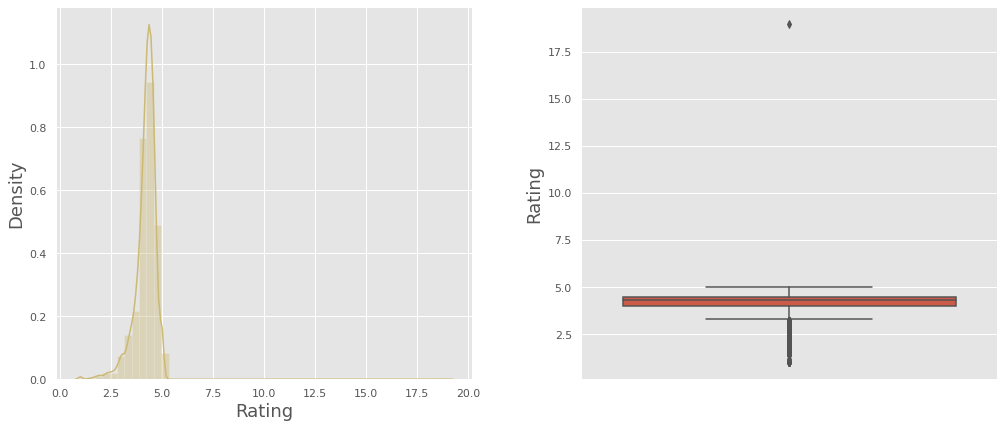

In [93]:
# Distribution and box plot of rating column
fig , ax = plt.subplots(1,2)
sns.distplot(apps_df['Rating'] , color = 'y' , ax = ax[0])
sns.boxplot( y = apps_df['Rating'] , ax = ax[1])
fig.tight_layout(pad = 3)

In [94]:
# The skewness and kurtosis of Rating column
print('skewness',apps_df.Rating.skew())
print('kurtosis',apps_df.Rating.kurt())

skewness 0.6418611034487824
kurtosis 65.42116716208271


The distribution of the 'Rating' column is right skewed. This might be due to the currepted data that we inspected before. We will first deal with it.  

In [95]:
apps_df[apps_df['Rating'] > 5]

,App,Category,Rating,Reviews,Size,...,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",...,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


This entire row seems to be currupted its better to drop it entirely.

In [96]:
apps_df.drop(apps_df[apps_df.Rating > 5].index , inplace = True)
apps_df[apps_df['Rating'] > 5]
apps_df['Rating'].dtype

dtype('float64')

In [97]:
# Lats check again the distribution of the Rating column
print('skewness',apps_df.Rating.skew())
print('kurtosis',apps_df.Rating.kurt())


skewness -1.8235171151017526
kurtosis 5.597087273761689


In [98]:
apps_df['Rating'].median()

4.3

Now it is left skewed so we will impute null values of the 'Rating' column with median value.

In [99]:
# Imputing the null values of rating column with median
apps_df['Rating'].fillna(apps_df['Rating'].median(), inplace = True)
print(null_count(apps_df))

             Null value Count
Type                        1
Current Ver                 8
Android Ver                 2


2) Type column:

In [100]:
# Distinct value count of Type column
apps_df['Type'].value_counts()

Free    9591
Paid     765
Name: Type, dtype: int64

The type column has only two unique values: Free and Paid.

If we check the price column for the null value of type column we will get the idea of what should be the value of the Type column. 

In [101]:
apps_df[apps_df['Type'].isnull()][['Type' , 'Price']]

,Type,Price
9148,NaN,0


The Price values is 0 for Type values nan so we will impute 'Free' inplace of null.

In [102]:
# Imputing the value in type column
apps_df['Type'].fillna('Free' , inplace = True)
null_count(apps_df)

,Null value Count
Current Ver,8
Android Ver,2


3)Current version and Android version:

In [103]:
# Check the current ver and android ver null values
print(apps_df[apps_df['Current Ver'].isnull() | apps_df['Android Ver'].isnull()][['Current Ver' , 'Android Ver']])
print('\n')
print('The Total no of rows Current ver and Android ver columns \
have null values:',len(apps_df[apps_df['Current Ver'].isnull() | apps_df['Android Ver'].isnull()][['Current Ver' , 'Android Ver']]))


      Current Ver Android Ver
15            NaN  4.2 and up
1553          NaN  1.5 and up
4453          4.4         NaN
4490          1.1         NaN
6322          NaN  4.0 and up
6803          NaN  1.6 and up
7333          NaN  4.0 and up
7407          NaN  2.3 and up
7730          NaN  2.0 and up
10342         NaN  3.0 and up


The Total no of rows Current ver and Android ver columns have null values: 10


Both Current ver and Android ver columns have total 10 rows consisting of null values. dropping all this rows won't affect our dataset. 

In [104]:
# Dropping the rows consisting of null values in android ver and current ver columns
indices_to_drop = apps_df[apps_df['Current Ver'].isnull() | apps_df['Android Ver'].isnull()].index
apps_df.drop(indices_to_drop , inplace = True)
print(null_count(apps_df))

Empty DataFrame
Columns: [Null value Count]
Index: []


We now have succssfully cleaned the missing and incorrect data in the apps_df now we would do the same for our second dataset of user reviews.

In [105]:
# Load the dataset
review_df = pd.read_csv('/content/drive/MyDrive/Copy of User Reviews (1).csv')
print(f'The dataset has {review_df.shape[0]} rows and {review_df.shape[1]} columns')

The dataset has 64295 rows and 5 columns


In [106]:
#Checking thee top 5 rows
review_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [107]:
# Deciption of the dataset
review_df.describe(include = 'all')

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
count,64295,37427,37432,37432.000000,37432.000000
unique,1074,27994,3,NaN,NaN
top,Bowmasters,Good,Positive,NaN,NaN
freq,320,247,23998,NaN,NaN
mean,NaN,NaN,NaN,0.182146,0.492704
std,NaN,NaN,NaN,0.351301,0.259949
min,NaN,NaN,NaN,-1.000000,0.000000
25%,NaN,NaN,NaN,0.000000,0.357143
50%,NaN,NaN,NaN,0.150000,0.514286
75%,NaN,NaN,NaN,0.400000,0.650000


In [108]:
# Removing all the duplactes 
review_df.drop_duplicates(inplace = True)
review_df.shape

(30679, 5)

In [109]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30679 entries, 0 to 64236
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     30679 non-null  object 
 1   Translated_Review       29692 non-null  object 
 2   Sentiment               29697 non-null  object 
 3   Sentiment_Polarity      29697 non-null  float64
 4   Sentiment_Subjectivity  29697 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.4+ MB


In [110]:
# Null values count report
print(null_count(review_df))

                        Null value Count
Translated_Review                    987
Sentiment                            982
Sentiment_Polarity                   982
Sentiment_Subjectivity               982


In [111]:
null_df = review_df[review_df['Translated_Review'].isnull() & review_df['Sentiment'].isnull() & \
          review_df['Sentiment_Polarity'].isnull() & review_df['Sentiment_Subjectivity'].isnull()]
null_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
362,1LINE – One Line with One Touch,NaN,NaN,NaN,NaN
405,2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,NaN,NaN,NaN,NaN
539,"2Date Dating App, Love and matching",NaN,NaN,NaN,NaN
628,2RedBeans,NaN,NaN,NaN,NaN
...,...,...,...,...,...
64082,Hotspot Shield Free VPN Proxy & Wi-Fi Security,NaN,NaN,NaN,NaN
64119,Hotstar,NaN,NaN,NaN,NaN
64156,Hotwire Hotel & Car Rental App,NaN,NaN,NaN,NaN
64202,Housing-Real Estate & Property,NaN,NaN,NaN,NaN


We won't get much of the information from this so we will drop it altogeter.

In [112]:
review_df.drop(null_df.index , inplace =True)
review_df.reset_index(inplace = True)
review_df.shape

(29697, 6)

In [113]:
print(null_count(review_df))

                   Null value Count
Translated_Review                 5


We have only a single column left having 5 null values.

In [114]:
review_df[review_df['Translated_Review'].isnull()]

,index,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
159,268,11st,NaN,Neutral,0.0,0.0
8149,15048,Birds Sounds Ringtones & Wallpapers,NaN,Neutral,0.0,0.0
10981,22092,Calorie Counter - MyFitnessPal,NaN,Neutral,0.0,0.0
14799,31623,DC Comics,NaN,Neutral,0.0,0.0
24619,52500,Garden Photo Frames - Garden Photo Editor,NaN,Neutral,0.0,0.0


These rows too seems to have redundant and unrecorded information so droping  wont affect our dataset.

In [115]:
# Dropping the null values and cross checking the null value count
review_df.dropna(inplace = True)
print(null_count(review_df))

Empty DataFrame
Columns: [Null value Count]
Index: []


Now we have cleaned the data it is now ready for the most important part of the data investigation and analysis in a data pipeline: Exploratory analysis and visualisation.

# Data Visualization on Play sore apps Dataset

Exploratory data analysis(**EDA**) is a method of analysing and summerizing the datasets in order to come up with some useful insights.

### Lets see the visualization of the number of apps secured by each category.



In [116]:
# Create the copies of the dataset
new_df = apps_df.copy()
new_review_df = review_df.copy()

In [117]:
new_df.head()

,App,Category,Rating,Reviews,Size,...,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,...,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,...,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,...,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,...,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,...,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [118]:
#Count of unique values categories
new_df['Category'].value_counts().sort_values(ascending = False)

FAMILY                 1940
GAME                   1121
TOOLS                   841
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         386
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     229
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           64
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

In [119]:
new_df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

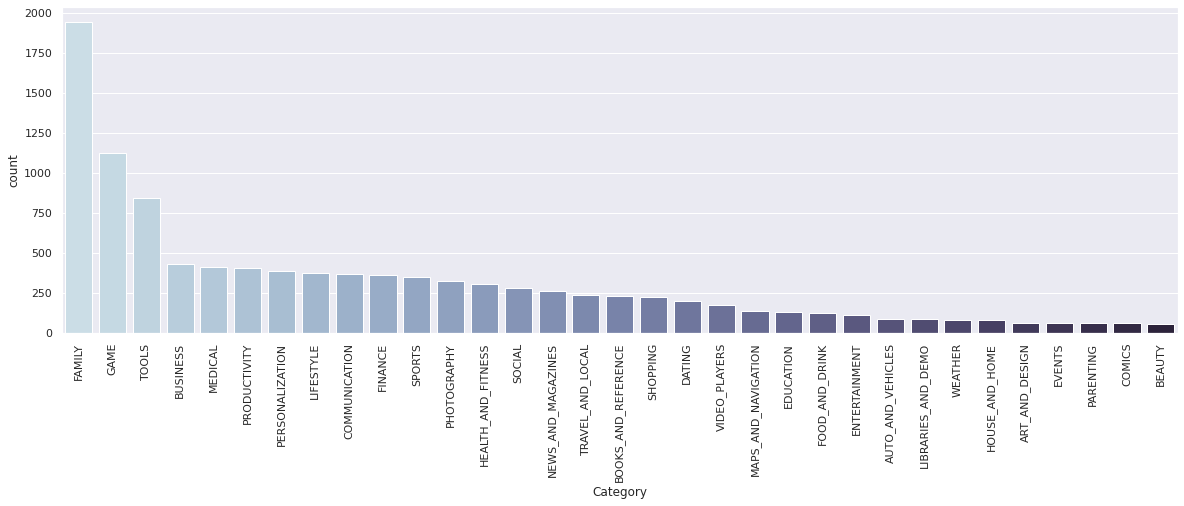

In [120]:
# Visualizing the count of apps of each categories
sns.set(rc = {'figure.figsize': (20,6)})
sns.countplot(x = 'Category',data = new_df, 
              order = new_df['Category'].value_counts().sort_values(ascending = False).index,
              palette = 'ch:s=.25,rot=-.25')
plt.xticks(rotation = 90)
plt.show()

Top five categories which have highest numbers of apps on the playstore are:
* Family
* Game
* Tools
* Business
* Medical



### Let's check the histogram of the  rating columns

Text(0.5, 0, 'Ratings')

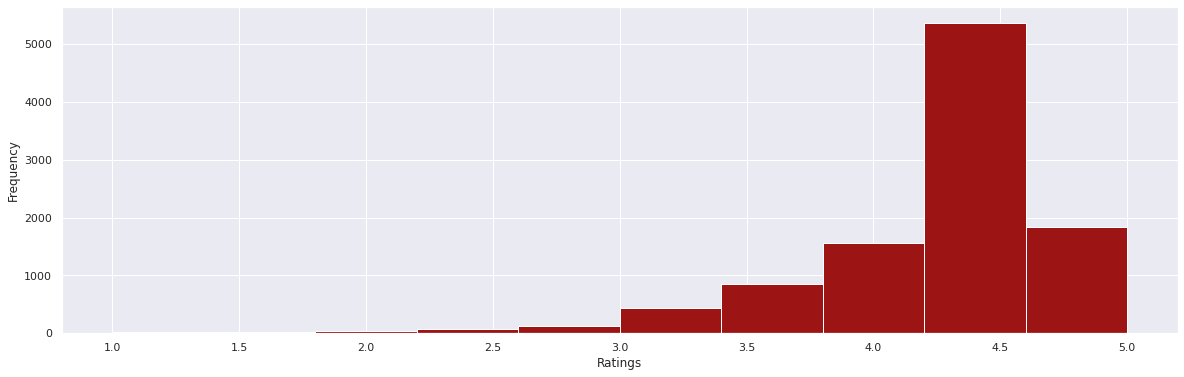

In [121]:
# Histogram of Rating column
new_df['Rating'].plot.hist(color = '#9c1414')
plt.xlabel('Ratings')

Most of the apps on the play store have rating between 4-5.

### Total reviews secured by each category

The Review column is not in its proper format. Its datatype should be numerical by it seems it is Object. We need to change its object format to Integer.

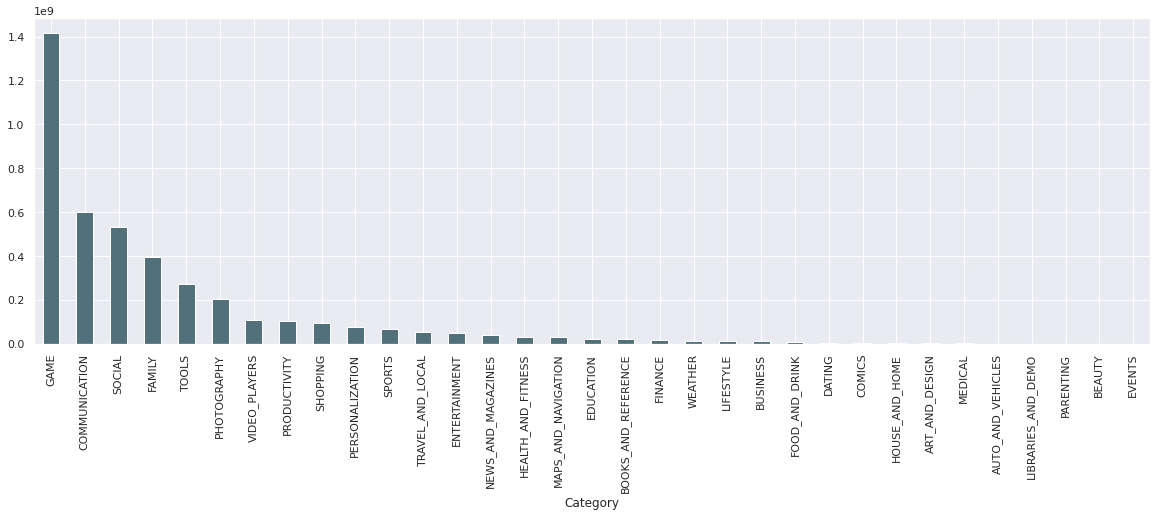

In [123]:
# Changing datatype of reviews column to integer
new_df['Reviews'] = new_df['Reviews'].astype('int')

# plotting total reviews for each categories
category_reviews = new_df.groupby('Category')['Reviews'].sum()
category_reviews.sort_values(ascending = False , inplace = True)
category_reviews.plot.bar(color = '#52707a')
plt.show()

Top 5 categories having highest number of reviews:  
1)Game

2)Communication

3)Social

4)Family

5)Tools

People prefer to review most of apps of **Game** category.
